# Principal component analysis (using Python)
Unsupervised dimensionality reduction

## Load data, split data, standardization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
dfX = pd.DataFrame(X)
dfX.columns = dataObj.feature_names
display(dfX.head())
print(dfX.shape)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(178, 13)


## Standardize the original dataset

In [2]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
temp = pd.DataFrame(data=X_std, columns=dfX.columns)
display(temp.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Construct covarince matrix

In [3]:
cov_mat = np.cov(X_std, rowvar=False)
dfCov = pd.DataFrame(cov_mat)
display(dfCov)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
1,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
2,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
3,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
4,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
5,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
6,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
7,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
8,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
9,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


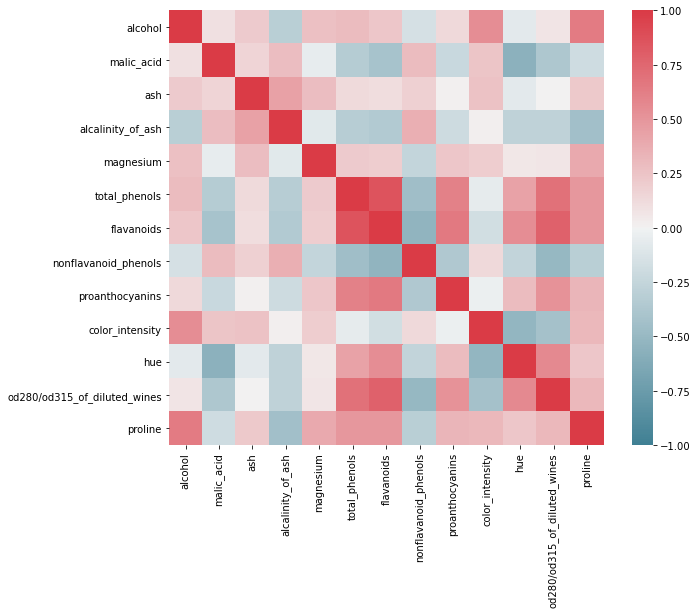

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dfX.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, vmin=-1, vmax=1)
plt.show()

## Eigendecomposition of the covariance matrix.

In [5]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [6]:
#Sort eigenvalues
idx = np.argsort(eigen_vals)
idx = idx[::-1] #Sort from max to min
eigen_vals = eigen_vals[idx]
eigen_vecs = eigen_vecs[:,idx]


In [7]:
#Eigenvectors
display(pd.DataFrame(eigen_vecs))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.144329,-0.483652,0.207383,-0.017856,0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,0.266286,0.014970
1,0.245188,-0.224931,-0.089013,0.536890,-0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,-0.121696,0.025964
2,0.002051,-0.316069,-0.626224,-0.214176,0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,0.049622,-0.141218
3,0.239320,0.010591,-0.612080,0.060859,-0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,0.055743,0.091683
4,-0.141992,-0.299634,-0.130757,-0.351797,-0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,-0.062220,0.056774
5,-0.394661,-0.065040,-0.146179,0.198068,0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,0.303882,-0.463908
6,-0.422934,0.003360,-0.150682,0.152295,0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,0.042899,0.832257
7,0.298533,-0.028779,-0.170368,-0.203301,0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,-0.042352,0.114040
8,-0.313429,-0.039302,-0.149454,0.399057,-0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,0.095553,-0.116917
9,0.088617,-0.529996,0.137306,0.065926,0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,-0.604222,-0.011993


In [8]:
#Eigenvalues
display(pd.DataFrame(eigen_vals.reshape(1,-1)))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.732437,2.511081,1.454242,0.924166,0.858049,0.645282,0.554141,0.350466,0.290512,0.25232,0.227064,0.169724,0.103962


## Total and explained variance

In [9]:
tot = sum(eigen_vals)
var_explained = eigen_vals/tot
cum_var_explained = np.cumsum(var_explained)


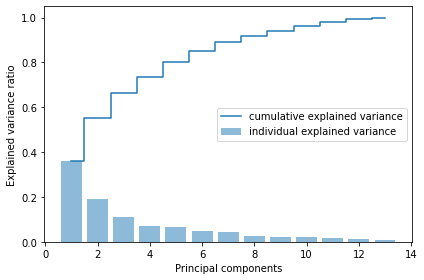

In [10]:
plt.bar(range(1, 14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_explained, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

## Transformation matrix, $W$

In [11]:
w = eigen_vecs[:,[0,1]]
display(pd.DataFrame(w))

,0,1
0,-0.144329,-0.483652
1,0.245188,-0.224931
2,0.002051,-0.316069
3,0.239320,0.010591
4,-0.141992,-0.299634
5,-0.394661,-0.065040
6,-0.422934,0.003360
7,0.298533,-0.028779
8,-0.313429,-0.039302
9,0.088617,-0.529996


### Transforming traning data

In [12]:
X_std_pca = X_std.dot(w)
display(pd.DataFrame(X_std_pca))

,0,1
0,-3.316751,-1.443463
1,-2.209465,0.333393
2,-2.516740,-1.031151
3,-3.757066,-2.756372
4,-1.008908,-0.869831
...,...,...
173,3.370524,-2.216289
174,2.601956,-1.757229
175,2.677839,-2.760899
176,2.387017,-2.297347


## Visualizing training data

In [13]:
def plot_reduced_dim(X_pca, y):
    colors = ["r", "b", "g"]
    markers = ["s", "x", "o"]
    fig, ax = plt.subplots()
    for l, c, m in zip(np.unique(y), colors, markers):
        ax.scatter(X_pca[y == l, 0], X_pca[y == l, 1], c=c, label=l, marker=m)
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.legend(loc="lower left")
    plt.tight_layout()
    plt.show()

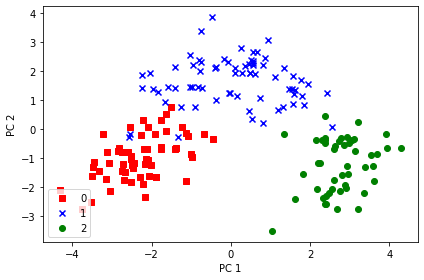

In [14]:
plot_reduced_dim(X_std_pca, y)

## Note
- It is possible to have Matrix W with its signs flipped. 
- If $v$ is an eigenvector of a matrix $\Sigma$, we have $\Sigma v = \lambda v,$ where $\lambda$ is our eigenvalue.
- Then $-v$ is also an eigenvector that has the same eigenvalue, since $\Sigma(-v) = -\Sigma v = -\lambda v = \lambda(-v).$

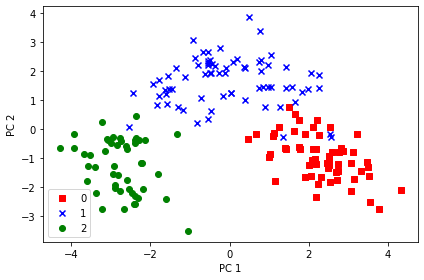

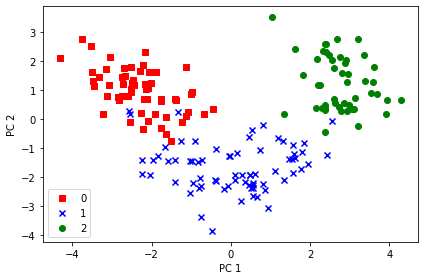

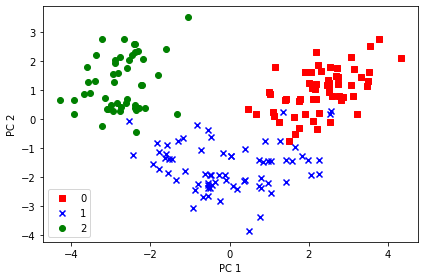

In [15]:
#Using eigenvectors with different signs
w2 = np.copy(w)
w2[:,0] = -w2[:,0]
X_std_pca = X_std.dot(w2)
plot_reduced_dim(X_std_pca, y)

w2 = np.copy(w)
w2[:,1] = -w2[:,1]
X_std_pca = X_std.dot(w2)
plot_reduced_dim(X_std_pca, y)

w2 = np.copy(w)
w2 = -w2
X_std_pca = X_std.dot(w2)
plot_reduced_dim(X_std_pca, y)
